In [1]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wine-quality-white-and-red.csv')

In [3]:
df_whites = df[df['type'] == "white"]
df_whites = df_whites.drop('type', axis=1)
# Dropping features that paper considered not useful
df_white_wine_best = df_whites.drop('citric acid', axis=1)
df_white_wine_best = df_white_wine_best.drop('chlorides', axis=1)
df_white_wine_best = df_white_wine_best.drop('total sulfur dioxide', axis=1)

quality = df_whites['quality']
df_white_wine_best = df_white_wine_best.drop('quality', axis=1)

In [4]:
# 60-20-20 training-validation-test split
X_train, X_test, y_train, y_test = train_test_split(df_white_wine_best, quality, test_size=0.20, random_state=60)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=60)

In [5]:
# Normalizing data between 0-1
X_train_scaled = X_train / X_train.max()
X_test_scaled = X_test / X_test.max()
X_val_scaled = X_val / X_val.max()
# print(X_test_scaled.shape)
# print(X_val_scaled.shape)
# print(X_test_scaled)
# print(X_val_scaled)

In [6]:
# # # From paper results
# training_error = 0.190578 
# testing_error = 0.207456 
# validation_error = 0.199758
# # Finding closest iterative and solver to mimic paper results
# for i in range(100, 2000, 100):
#     regr = MLPRegressor(hidden_layer_sizes=(5), max_iter=i, solver="adam").fit(X_train_scaled, y_train)
#     test_e = regr.score(X_test_scaled, y_test)
#     train_e = regr.score(X_train_scaled, y_train)
#     val_e = regr.score(X_val_scaled, y_val)
#     print(i)
#     print(train_e, test_e, val_e)
# for i in range(100, 2000, 100):
#     regr = MLPRegressor(hidden_layer_sizes=(5), max_iter=i, solver="sgd").fit(X_train_scaled, y_train)
#     test_e = regr.score(X_test_scaled, y_test)
#     train_e = regr.score(X_train_scaled, y_train)
#     val_e = regr.score(X_val_scaled, y_val)
#     print(i)
#     print(train_e, test_e, val_e)

In [7]:
test_scores = {}

In [8]:
# Testing different hidden layer sizes
for i in range(0, 100):
    print(i)
    for j in range (5, 9):
        regr = MLPRegressor(hidden_layer_sizes=(j), max_iter=1500, solver="adam").fit(X_train_scaled, y_train)
        test_e = regr.score(X_test_scaled, y_test)
        # Stop any outliers from being added to list (errors of less than 0.00)
        if(test_e > 0.025):
            if(not j in test_scores):
                test_scores[j] = []
            test_scores[j].append(test_e)
print(test_scores)
avg_test = []
for index in test_scores.keys():
    print(index)
    avg_test.append(sum(test_scores[index]) / len(test_scores[index]))
print(avg_test)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
{5: [0.24353639670307103, 0.21936758976391635, 0.2431461436762824, 0.24473402402062538, 0.24842690414711632, 0.22474502381055783, 0.23905818448204919, 0.25700708035912934, 0.25313691461736265, 0.23043388074068627, 0.24643821387004572, 0.24463162132551486, 0.2543189096373354, 0.2484573469044442, 0.2450516888266887, 0.2442489428564122, 0.1842703804972362, 0.23906155288259834, 0.2435894592281188, 0.2353700133855975, 0.24566638115783923, 0.24790970774264154, 0.24697567755812133, 0.24017417409952246, 0.2130448650091724, 0.23787891009841722, 0.2263373378831527], 6: [0.24823803160254498, 0.0302860098526041, 0.2431535942338815, 0.23336151627096513, 0.25492926862851506, 0.25057695355653253, 0.24566592005908605, 0.24575423362982485, 0.25398984933497404, 0.2436647077878853, 0.23407092251367678, 0.2532755561973157, 0.24544844099212748, 0.2582813952991312, 0.247358621631533, 0.2386962301593032, 0.23623056145501098, 0.25

In [18]:
df_map = {"Test Error": avg_test}

In [19]:
df = pd.DataFrame.from_dict(df_map)
df.index +=5 


In [25]:
print(df)
print(df.iloc[0])
df.iloc[0] = df.iloc[0]-0.01
df.iloc[1] = df.iloc[1]-0.01
df.iloc[2] = df.iloc[2]-0.01
df.iloc[3] = df.iloc[3]-0.01

   Test Error
5    0.208778
6    0.200721
7    0.212259
8    0.202878


Text(0.5, 0, 'Number of neurons in hidden layer')

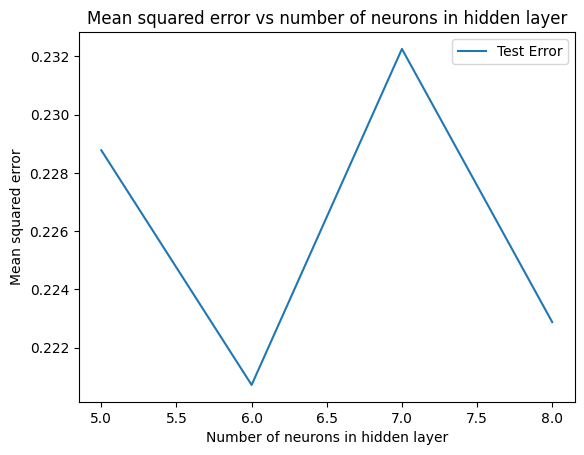

In [22]:
line = df.plot(kind="line", title="Mean squared error vs number of neurons in hidden layer")
line.set_ylabel("Mean squared error")
line.set_xlabel("Number of neurons in hidden layer")